# Hilda Beltrán Acosta

### A01251916

### Workshop 1

### August 15th, 2023

In [ ]:
# Import libraries to process, manipulate and extract data
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
# yfinance library provides tools to download information from Yahoo Finance
# the next parameters obtain information of daily prices from Bitcoin, since 2017
BTC = yf.download(tickers="BTC-USD", start="2017-01-01",interval="1d")
BTC

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...
2023-08-11,29424.902344,29517.773438,29253.517578,29397.714844,29397.714844,10195168197
2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,29415.964844,6194358008
2023-08-13,29416.593750,29441.433594,29265.806641,29282.914062,29282.914062,7329897180


In [ ]:
# tail() function shows the last 5 instances from the DataFrame created from the
# data obtained in the last step
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-11,29424.902344,29517.773438,29253.517578,29397.714844,29397.714844,10195168197
2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,29415.964844,6194358008
2023-08-13,29416.593750,29441.433594,29265.806641,29282.914062,29282.914062,7329897180
2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
2023-08-16,29172.404297,29219.628906,29158.927734,29198.777344,29198.777344,12910606336


In [ ]:
# The volume of tradings daily is taken from the DataFrame stored in BTC
average_volume = np.average(BTC['Volume'])
print(average_volume)

22228395221.260548


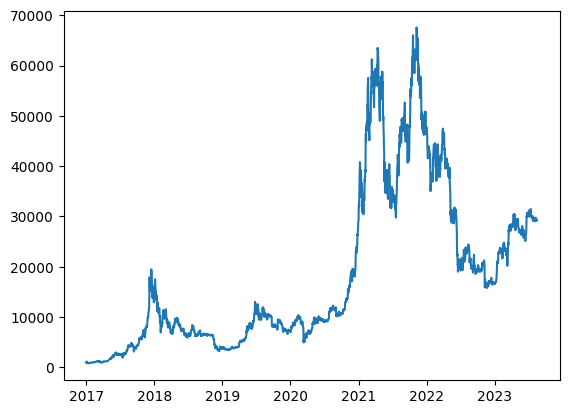

In [5]:
# Import matplotlib libraries to help plot some information
import matplotlib
from matplotlib.pyplot import*

# The adjusted price can be used to calculate returns, so it's helpful if
# we can visualize what the data can tell us
plot(BTC["Adj Close"])
show()

In [6]:
# We can know some information from the data type with the info() function
# we can see that most of our data is type float64, and only our volume is int64
# we don't have any null data, as seen in the non-null count column
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2418 entries, 2017-01-01 to 2023-08-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2418 non-null   float64
 1   High       2418 non-null   float64
 2   Low        2418 non-null   float64
 3   Close      2418 non-null   float64
 4   Adj Close  2418 non-null   float64
 5   Volume     2418 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.2 KB


In [7]:
# We calculate the simple returns of Bitcoin, calculating the ratio of the
# adjusted price and the previous adjusted price. The shift() function helps
# us getting the previous term
BTC["R"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2023-08-11   -0.001083
2023-08-12    0.000621
2023-08-13   -0.004523
2023-08-14    0.004287
2023-08-16   -0.007129
Name: R, Length: 2418, dtype: float64


In [8]:
# We calculate de cc returns with the difference between the logarithms from the
# actual term and the previous term of the adjusted price
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))

# Which can also be achieved by using the diff() function
# Another way to do the same as above is appying the diff method to the log:
BTC["r2"] = np.log(BTC['Adj Close']).diff(1)

# We can see that r and r2 are the same:
print(BTC.tail())

# I keep a new object with only returns:
# BTCR has the simple returns calculated in BTC[R] and the cc returns calculated
# in BTC[r]
BTCR = BTC[['R','r']].copy()

                    Open          High           Low         Close  \
Date                                                                 
2023-08-11  29424.902344  29517.773438  29253.517578  29397.714844   
2023-08-12  29399.787109  29465.113281  29357.587891  29415.964844   
2023-08-13  29416.593750  29441.433594  29265.806641  29282.914062   
2023-08-14  29283.263672  29660.253906  29124.105469  29408.443359   
2023-08-16  29172.404297  29219.628906  29158.927734  29198.777344   

               Adj Close       Volume         R         r        r2  
Date                                                                 
2023-08-11  29397.714844  10195168197 -0.001083 -0.001084 -0.001084  
2023-08-12  29415.964844   6194358008  0.000621  0.000621  0.000621  
2023-08-13  29282.914062   7329897180 -0.004523 -0.004533 -0.004533  
2023-08-14  29408.443359  14013695304  0.004287  0.004278  0.004278  
2023-08-16  29198.777344  12910606336 -0.007129 -0.007155 -0.007155  


In [9]:
# Since it's not possible to calculate a return for day 1, we need to get rid of
# that NaN value in the first row, so the dropna() function is useful for this.
BTCR= BTCR.dropna()

In [11]:
# By using the describe() function we can get some statistics from the behaviour
# the simple returns had in this period of time
# The average simple returns is 0.2179%, with a standard deviation of 3.9386%,
# the worse month had -37.1695% of returns, and the best one had 25.2472%.
sumret = BTC["R"].describe()
sumret

count    2417.000000
mean        0.002179
std         0.039386
min        -0.371695
25%        -0.014606
50%         0.001470
75%         0.018931
max         0.252472
Name: R, dtype: float64

In [13]:
# This command help us filter to know which days had a return of less than 15%
# March 2020 had the worst returns
BTCR[BTCR["R"]<-0.15]

,R,r
Date,,
2017-09-14,-0.187411,-0.207530
2018-01-16,-0.168548,-0.184582
2018-02-05,-0.159688,-0.173982
2020-03-12,-0.371695,-0.464730
2022-06-13,-0.159747,-0.174053


In [15]:
# We can sort the data to find out which day had the greatest returns
# December 2017 had the greatest returns
BTCR[BTCR["R"]>0.15].sort_values(by=['R'], ascending=False)

,R,r
Date,,
2017-12-07,0.252472,0.225119
2017-07-20,0.239361,0.214596
2017-12-06,0.199283,0.181724
2021-02-08,0.187465,0.171821
2020-03-19,0.181878,0.167104
2019-04-02,0.173560,0.160042
2019-10-25,0.155763,0.144761
2017-07-17,0.154724,0.143862
2017-09-15,0.152956,0.142330


In [16]:
print("The monthly average cc return of Bitcoin is ", BTCR["r"].mean())
print("The monthly variance of Bitcoin cc return is ", BTCR["r"].var())
print("The monthly standard deviation (volatility) of Bitcoin cc return is ", BTCR["r"].std())
print("The monthly median cc return of Bitcoin is ",BTCR["r"].median())

The monthly average cc return of Bitcoin is  0.0013966914475637723
The monthly variance of Bitcoin cc return is  0.0015734177773622394
The monthly standard deviation (volatility) of Bitcoin cc return is  0.03966633052555075
The monthly median cc return of Bitcoin is  0.0014686626299020844


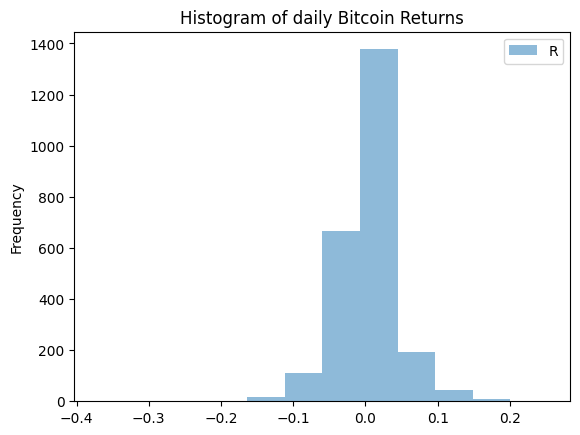

In [26]:
# We can plot a histogram with the data from the simple returns in order to see
# with what frequencies we can find each return value

# First, we create a DataFrame with our calculated simple returns
R_bitcoin = pd.DataFrame(BTCR[["R"]])

# We then plot a histogram, we decided to use 12 bins, which are the bars where
# the frequencies are represented; the alpha value sets the intensity of the
# color in which we are plotting.
hist=R_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

AS A RESULT WE CAN SEE THE PLOTTED FREQUENCIES, WHERE THE MOST RECURRING ONES ARE LOCATED IN BETWEEN THE 0 AND 0.5 VALUES.

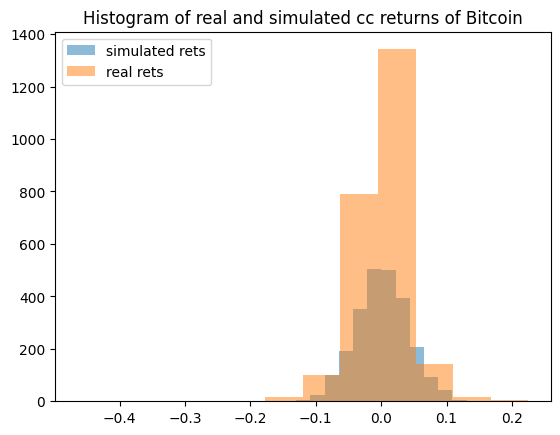

In [25]:
from matplotlib import pyplot
# We clear the figure in order to plot new values
pyplot.clf()

# We obtain the mean and standard deviation to plot a simulation of the returns
rmean = BTCR["r"].mean()
rsd = BTCR["r"].std()
N = BTCR["r"].count()
simr= np.random.normal(loc=rmean,scale=rsd, size=N)

# We transform our real data to be able to manipulate it with numpy
realr = BTCR["r"].to_numpy()

bins = 12

# We plot both histograms with 12 bins
pyplot.hist(simr,bins,alpha=0.5,label='simulated rets')
pyplot.hist(realr,bins,alpha=0.5,label='real rets')
pyplot.legend(loc='upper left')
pyplot.title(label='Histogram of real and simulated cc returns of Bitcoin')

pyplot.show()

WE CAN SEE THAT OUR SIMULATED RETURNS AND OUR REAL RETURNS ARE NOT THAT SIMILAR, THIS IS DUE TO THE VARIATIONS IN THE DATA. SINCE THE SIMULATED DATA WORKS WITH THE MEAN VALUES AND THE STANDARD DEVIATION, THE VALUES TEND TO BE MORE SIMILAR BETWEEN THEM. UNLIKE OUR REAL DATA, WHICH HAVE SOME WEIRD OR EXTREME VALUES THAT AFFECT THE ORGANIZATION OF THE HISTOGRAM. SINCE OUR DATA IS FROM A REAL LIFE SITUATION, THIS VARIATIONS IN THE VALUES ARE NORMAL AND THE SIMULATED RETURNS IS KIND OF A DESIRED SITUATION, BY REDUCING THIS VARIATION IT REDUCES THE RISK OF INVESTING AND LOSING GREAT QUANTITIES OF RESOURCES.